In [1]:
import category_encoders as ce
import numpy as np
import pandas as pd

from sklearn.linear_model import PassiveAggressiveClassifier,PassiveAggressiveRegressor
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingRegressor, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
def positive_negative (v):
    if float(v) >= 0:
        return 1
    else:
        return 0

In [71]:
df_data_reg = pd.read_csv('GapUp_Training.csv', header=0, encoding='ascii', engine='python')

df_data = pd.read_csv('GapUp_Training.csv', header=0, encoding='ascii', engine='python')
df_data['P_Change'] = df_data['P_Change'].map(positive_negative)

In [72]:
print(df_data.head())
len(df_data)

print(df_data_reg.head())
len(df_data_reg)

       Mkt_Cap   Float      Gap0      pC_1      pC_2      pC_3       V_P  \
0  2148.300035  185.07  0.053462  0.046789  0.029464 -0.043159  0.050701   
1  2144.579950  185.07  0.074856 -0.043159 -0.027178  0.016963  0.055002   
2  2414.279915  185.07  0.052196 -0.048857  0.072811  0.055882  0.060773   
3  2245.019943  185.07  0.090206  0.072811  0.055882  0.031185  0.100922   
4  1629.360043  185.07  0.059683 -0.010843  0.002421  0.035980  0.046273   

       V1_P      V2_P      V3_P  P_Change  
0  0.037587  0.055002  0.064621         0  
1  0.064621  0.044589  0.042046         1  
2  0.100922  0.061764  0.046300         1  
3  0.061764  0.046300  0.033863         0  
4  0.023855  0.049265  0.056982         1  
       Mkt_Cap   Float      Gap0      pC_1      pC_2      pC_3       V_P  \
0  2148.300035  185.07  0.053462  0.046789  0.029464 -0.043159  0.050701   
1  2144.579950  185.07  0.074856 -0.043159 -0.027178  0.016963  0.055002   
2  2414.279915  185.07  0.052196 -0.048857  0.07281

40925

In [73]:
X = np.array(df_data.drop(['P_Change'],1))
y = np.array(df_data['P_Change'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [74]:
import numpy as np
import matplotlib.pyplot as plt

#ExtraTrees
clf = ExtraTreesClassifier(n_estimators=250,random_state=0).fit(X_train,y_train)
print ('classification score: %s'%(clf.score(X_test, y_test)))
clfExtra = ExtraTreesClassifier (n_estimators=250,random_state=0).fit(X,y)

importances = clfExtra.feature_importances_
std = np.std([tree.feature_importances_ for tree in clfExtra.estimators_],
             axis=0)
indices = np.argsort(importances)

classification score: 0.7005497861942578


### Gap Up Variable importance

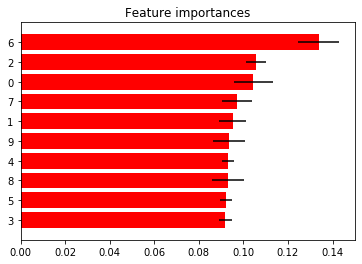

In [75]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap: Mkt_Cap	Float	Gap0	pC_1	V_P 	V1_P

### First Red Day Variable importance

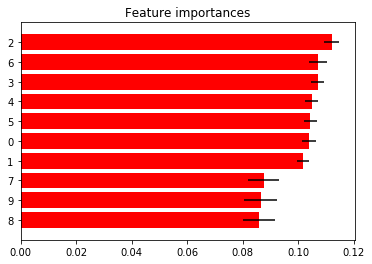

In [70]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap: Mkt_Cap	Float	Gap0	pC_1	V_P 	V1_P

In [76]:
#Gradiant Boosting Ensemble learning
clf = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X_train,y_train)
print ('classification score: %s'%(clf.score(X_test, y_test)))
clfP = GradientBoostingClassifier (learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X,y)

classification score: 0.6965180207697007


In [77]:
#regression prep
X = np.array(df_data_reg.drop(['P_Change'],1))
y = np.array(df_data_reg['P_Change'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

#Gradiant Boosting Ensemble learning
clf = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X_train,y_train)
print ('regression score: %s'%(clf.score(X_test, y_test)))
clfP_reg = GradientBoostingRegressor (learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X,y)

regression score: 0.16194048670526595


In [78]:
#pickling predictors
import pickle as pk

with open('GAP9_GB_Classifier.p','wb') as f:
    pk.dump(clfP,f)
with open('GAP9_ET_Classifier.p','wb') as f:
    pk.dump(clfExtra,f)
with open('GAP9_GB_Regressor.p','wb') as f:
    pk.dump(clfP_reg,f)

## Morning Predictions

In [40]:
#pickling predictors
import pickle as pk

clfP = pk.load(open('GAP_GB_Classifier.p','rb'))
clfExtra = pk.load(open('GAP_ET_Classifier.p','rb'))
clfP_reg = pk.load(open('GAP_GB_Regressor.p','rb'))

In [64]:
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap: Mkt_Cap	Float	Gap0	pC_1	V_P 	V1_P

MarketCap = 122.45
Float = 20.28
#gap up from close yesterday 
gapUp = 0.02
#price increase yesterday
pC_1 = 0.2
#volume expected today as a % of Float
V_P = 1
#volume yesterday as a % of Float
V1_P =  2

pC_2 = 0
pC_3 = 0
V2_P = 0
V3_P = 0

# predict_list = [MarketCap,Float,gapUp,pC_1,pC_2,pC_3,V_P,V1_P,V2_P,V3_P]
predict_list = [MarketCap,Float,gapUp,pC_1,V_P,V1_P]

In [65]:
#Float(M), MktCap(M), Yday_v_float, Tday_v_float
print('Gradiant Boosting classification: {}, probabilities: {}'.format(clfP.predict([predict_list]),clfP.predict_proba([predict_list])))
print('Extra Tree classification: {}, probabilities: {}'.format(clfExtra.predict([predict_list]),clfExtra.predict_proba([predict_list])))
print('Gradiant Boosting regression: {}'.format(clfP_reg.predict([predict_list])))

Gradiant Boosting classification: [1], probabilities: [[0.24375068 0.75624932]]
Extra Tree classification: [0], probabilities: [[0.896 0.104]]
Gradiant Boosting regression: [-0.03944589]


In [6]:
'''
Backlog: 
-Enable scraping of predictive features from just entering Ticker symbol
-Enable auto scraping of up to date training data
-add previous day price data
-automate morning screener: https://www.chartmill.com/chartmill-rest/screener/?sort=((preMarketLast/close)%20-%201)%20*%20100&sorting=DESC&conditions=freeFloat%3C50000000,shares*close%3C300000000,shares*close%3E50000000,smaVolume50%20%3E%20200000,etf=0,(preMarketVolume%3E100000)&exchanges=125,119,3&start=0
'''

'\nBacklog: \n-Enable scraping of predictive features from just entering Ticker symbol\n-Enable auto scraping of up to date training data\n'